In [1]:
import pandas as pd
import numpy as np
df = pd.read_excel('pos.xlsx',header=None)
df=np.asarray(df[[6,7]])

In [2]:
df.shape

(127, 2)

In [3]:
asp_mean=np.mean(df[:,0])
area_mean=np.mean(df[:,1])
asp_std=np.std(df[:,0])
area_std=np.std(df[:,1])

In [4]:
from sklearn.cluster import KMeans
from sklearn import preprocessing
import sklearn.cluster as cluster
import sklearn.metrics as metrics
from sklearn.preprocessing import StandardScaler

In [5]:
scaler = StandardScaler()
scale = scaler.fit_transform(df)

In [6]:
km=KMeans(n_clusters=2)
y_predicted = km.fit_predict(scale)
y_predicted

C:\Users\HP\.conda\envs\tf_2_10\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0])

In [7]:
km.cluster_centers_

array([[ 1.13178173,  0.79248485],
       [-0.784702  , -0.54945616]])

In [8]:
pred=km.predict([[0,0]])
if pred==1:
    print("True")

True


C:\Users\HP\.conda\envs\tf_2_10\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


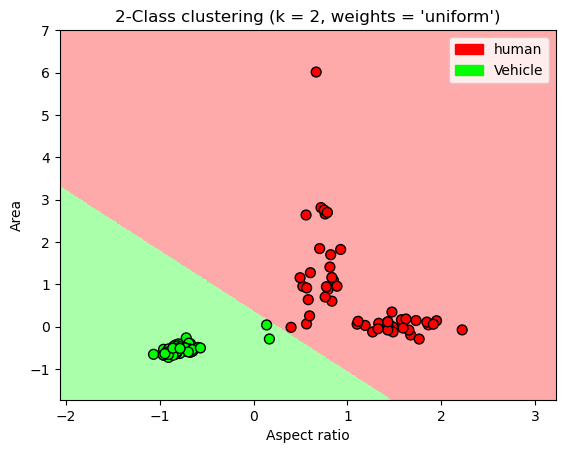

In [9]:
# For Data Visualization
import matplotlib.cm as cm
from matplotlib.colors import ListedColormap, BoundaryNorm
import matplotlib.patches as mpatches
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
def plot_kmean(X, n_clusters, weights):
    X_mat = X
# Create color maps
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA'])
    cmap_bold  = ListedColormap(['#FF0000', '#00FF00'])
    clf = KMeans(n_clusters)
    clf.fit(X_mat)
    y_mat=clf.predict(X_mat)
# Plot the decision boundary by assigning a color in the color map
    # to each mesh point.

    mesh_step_size = .01  # step size in the mesh
    plot_symbol_size = 50

    x_min, x_max = X_mat[:, 0].min() - 1, X_mat[:, 0].max() + 1
    y_min, y_max = X_mat[:, 1].min() - 1, X_mat[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, mesh_step_size),
                         np.arange(y_min, y_max, mesh_step_size))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
# Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
# Plot training points
    plt.scatter(X_mat[:, 0], X_mat[:, 1], s=plot_symbol_size, c=y_mat, cmap=cmap_bold, edgecolor = 'black')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    patch0 = mpatches.Patch(color='#FF0000', label='human')
    patch1 = mpatches.Patch(color='#00FF00', label='Vehicle')
    plt.legend(handles=[patch0, patch1])
    plt.xlabel('Aspect ratio')
    plt.ylabel('Area')
    plt.title("2-Class clustering (k = %i, weights = '%s')" % (n_clusters, weights))    
plot_kmean(scale, 2, 'uniform')

In [10]:
import cv2
import numpy as np

# load the video file
cap = cv2.VideoCapture("Test_traffic.avi")
bg=cv2.imread("a-PhotoRoom.jpg")

# setting the background as None in the beginning
bgframe = None

while True:
    # access the frame from the video
    success,img = cap.read()

    # check if we get the frame
    if success == True:
        # resizing the frame because there is no need to process a large size frame
        bg = cv2.resize(bg,(600,500))
        img = cv2.resize(img,(600,500))
        
        # change the bgr frame into grayscale  format
        bg_gray = cv2.cvtColor(bg,cv2.COLOR_BGR2GRAY)
        gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
        #dilated_img = cv2.dilate(gray, np.ones((7,7), np.uint8))
        #bg_img = cv2.medianBlur(dilated_img, 21)
        #diff_img = 255 - cv2.absdiff(gray, bg_img)
        #norm_img = cv2.normalize(diff_img,None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8UC1)

        # Applying Gaussian Blur on the Frame heavily to avoid any change in pixels intensity that
        # may occur due to camera sensor as no camera can capture a 100% accurate image.
        bg_gray = cv2.GaussianBlur(bg_gray,(35,35),0)
        gray = cv2.GaussianBlur(gray,(35,35),0)

        # in the very first iteration of while loop our background (bgframe) will be None so need to provide the
        # frame as background
        if bgframe is None:
            bgframe = bg_gray

        # Compute the difference between the first  frame (background) and current frame
        # using simple subtraction
        # delta = |background- current frame|
        frameDelta = cv2.absdiff(bgframe, gray)

        # if any pixel value in 'frameDelta' is less than 25, we discard the pixel and set it to black (i.e. background).
        # If it is greater than 25, we’ll set it to white (i.e. foreground)
        _,thresh = cv2.threshold(frameDelta,25,255,cv2.THRESH_BINARY)

        # creating a kernel of 7x7
        kernel = np.ones((7, 7), np.uint8)
        
        # dilating the frame
        thresh = cv2.dilate(thresh, None, iterations=6)
        # finding the contours
        contours, heirarchy = cv2.findContours(thresh,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)

        for contour in contours:
            # finding area of contour
            area = cv2.contourArea(contour)
            #print(area)
            # if area greater than the specified value the only then we will consider it
            if area > 1000:
                # find the rectangle co-ordinates
                x,y,w,h = cv2.boundingRect(contour)
                # Aspect ratio and area calculations
                asp_rat=w/h
                area=w*h
                asp_rat=(asp_rat-asp_mean)/asp_std
                area=(area-area_mean)/area_std
                # Model prediction
                pred=km.predict([[asp_rat,area]])
                if pred == 0:
                    # and then draw it to indicate the moving object
                    cv2.rectangle(img,(x,y),(x+w,y+h),(0,0,255),3)
                    cv2.putText(img,'human',(x,y-5),cv2.FONT_HERSHEY_SIMPLEX,0.5,(0,0,255),2)
                else:
                    cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),3)
                    cv2.putText(img,'Vehicle',(x,y-5),cv2.FONT_HERSHEY_SIMPLEX,0.5,(0,255,0),2)
                    

        # displaying the frame
        cv2.imshow('VIDEO',img)
        cv2.imshow('threshold',thresh)
        
    if cv2.waitKey(33) == 13:
        break
cap.release()
cv2.destroyAllWindows()

In [12]:
import cv2
import numpy as np

# load the video file
cap = cv2.VideoCapture("Test_traffic.avi")
bg=cv2.imread("a-PhotoRoom.jpg")

# setting the background as None in the beginning
bgframe = None

while True:
    # access the frame from the video
    success,img = cap.read()

    # check if we get the frame
    if success == True:
        # resizing the frame because there is no need to process a large size frame
        bg = cv2.resize(bg,(600,500))
        img = cv2.resize(img,(600,500))
        
        # change the bgr frame into grayscale  format
        bg_gray = cv2.cvtColor(bg,cv2.COLOR_BGR2GRAY)
        gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
        #dilated_img = cv2.dilate(gray, np.ones((7,7), np.uint8))
        #bg_img = cv2.medianBlur(dilated_img, 21)
        #diff_img = 255 - cv2.absdiff(gray, bg_img)
        #norm_img = cv2.normalize(diff_img,None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8UC1)

        # Applying Gaussian Blur on the Frame heavily to avoid any change in pixels intensity that
        # may occur due to camera sensor as no camera can capture a 100% accurate image.
        bg_gray = cv2.GaussianBlur(bg_gray,(35,35),0)
        gray = cv2.GaussianBlur(gray,(35,35),0)

        # in the very first iteration of while loop our background (bgframe) will be None so need to provide the
        # frame as background
        if bgframe is None:
            bgframe = bg_gray

        # Compute the difference between the first  frame (background) and current frame
        # using simple subtraction
        # delta = |background- current frame|
        frameDelta = cv2.absdiff(bgframe, gray)

        # if any pixel value in 'frameDelta' is less than 25, we discard the pixel and set it to black (i.e. background).
        # If it is greater than 25, we’ll set it to white (i.e. foreground)
        _,thresh = cv2.threshold(frameDelta,25,255,cv2.THRESH_BINARY)

        # creating a kernel of 7x7
        kernel = np.ones((7, 7), np.uint8)
        
        # dilating the frame
        thresh = cv2.dilate(thresh, None, iterations=6)
        # finding the contours
        contours, heirarchy = cv2.findContours(thresh,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)

        for contour in contours:
            # finding area of contour
            area = cv2.contourArea(contour)
            #print(area)
            # if area greater than the specified value the only then we will consider it
            if area > 1000:
                # find the rectangle co-ordinates
                x,y,w,h = cv2.boundingRect(contour)
                # Aspect ratio and area calculations
                asp_rat=w/h
                if w<h:
                    area_h=w*h
                else:
                    area_v=w*h
                #asp_rat=(asp_rat-asp_mean)/asp_std
                #area=(area-area_mean)/area_std
                # Model prediction
                #pred=km.predict([[asp_rat,area]])
                if (asp_rat < 1) and (area_h < area_v):
                    # and then draw it to indicate the moving object
                    cv2.rectangle(img,(x,y),(x+w,y+h),(0,0,255),3)
                    cv2.putText(img,'human',(x,y-5),cv2.FONT_HERSHEY_SIMPLEX,0.5,(0,0,255),2)
                else:
                    cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),3)
                    cv2.putText(img,'Vehicle',(x,y-5),cv2.FONT_HERSHEY_SIMPLEX,0.5,(0,255,0),2)
                    

        # displaying the frame
        cv2.imshow('VIDEO',img)
        cv2.imshow('threshold',thresh)
        
    if cv2.waitKey(33) == 13:
        break
cap.release()
cv2.destroyAllWindows()